# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Mon Mar 16 10:06:09 2020


In [2]:
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
# import src.preprocessing.pytorchtransforms as preprocessing
import src.preprocessing.albumentationstransforms as preprocessing
import src.utils.utils as utils
import src.models.train_model as train
import src.visualization.plotdata as plotdata
import src.preprocessing.customcompose as customcompose

%config IPCompleter.greedy=True
%reload_ext autoreload


In [3]:
%autoreload 2  # Autoreload all modules

In [4]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)

In [5]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

    if ram_gb < 20:
      print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
      print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
      print('re-execute this cell.')
    else:
      print('You are using a high-RAM runtime!')

In [6]:
import torch
print(torch.__version__)

1.4.0


In [7]:
preproc = preprocessing.AlbumentaionsTransforms()
train_transforms = preproc.gettraintransforms()
test_transforms = preproc.gettesttransforms()
compose_train = customcompose.CustomCompose(train_transforms)
compose_test = customcompose.CustomCompose(test_transforms)

In [8]:
ds = dst.Dataset()
train_dataset = ds.gettraindataset(compose_train)
test_dataset = ds.gettestdataset(compose_test)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
batch_size = 128
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset,batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

CUDA Available? True
128


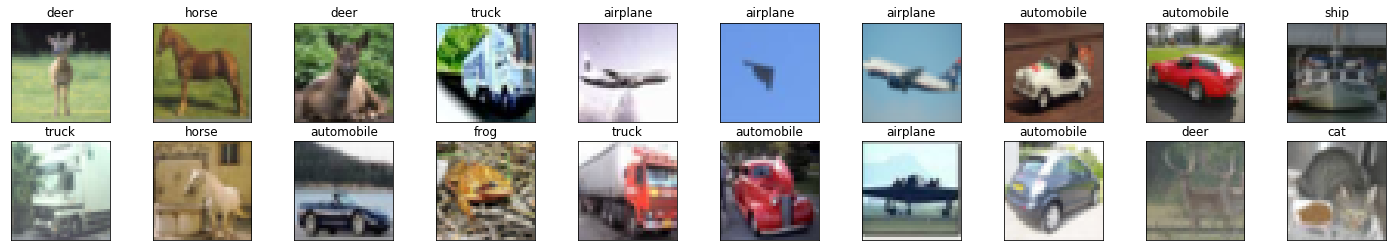

In [10]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

#TODO show transformed images fom dataset
dataiterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(dataiterator,classes=classes)

In [11]:
cnn_model, device = utils.Utils.createmodelresnet18()
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [12]:
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=0.0125)
scheduler = utils.Utils.createscheduler(optimizer, mode='max', factor=0.1, patience=1,
                                        verbose=True)

In [13]:
lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 51
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(cnn_model, device, test_loader, class_correct=class_correct,
                                   class_total=class_total, epoch=epoch)
    scheduler.step(t_acc_epoch)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


/home/abhijit/.virtualenvs/dl4cv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=1.0974881649017334 Batch_id=390 Accuracy=52.51: 100%|██████████| 391/391 [01:46<00:00,  3.65it/s]



Test set: Average loss: 0.0089, Accuracy: 6100/10000 (61.00%)

Validation accuracy increased (0.000000 --> 61.000000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  2
EPOCH: 2


Loss=0.6662925481796265 Batch_id=390 Accuracy=72.20: 100%|██████████| 391/391 [02:02<00:00,  3.20it/s] 



Test set: Average loss: 0.0067, Accuracy: 7076/10000 (70.76%)

Validation accuracy increased (61.000000 --> 70.760000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  3
EPOCH: 3


Loss=0.7393729090690613 Batch_id=390 Accuracy=77.62: 100%|██████████| 391/391 [01:50<00:00,  3.54it/s] 



Test set: Average loss: 0.0066, Accuracy: 7101/10000 (71.01%)

Validation accuracy increased (70.760000 --> 71.010000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  4
EPOCH: 4


Loss=0.5774168968200684 Batch_id=390 Accuracy=80.54: 100%|██████████| 391/391 [01:38<00:00,  3.97it/s] 



Test set: Average loss: 0.0063, Accuracy: 7307/10000 (73.07%)

Validation accuracy increased (71.010000 --> 73.070000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  5
EPOCH: 5


Loss=0.6382121443748474 Batch_id=390 Accuracy=82.17: 100%|██████████| 391/391 [01:36<00:00,  4.06it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6966/10000 (69.66%)

Learning rate = 0.01  for epoch:  6
EPOCH: 6


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7276/10000 (72.76%)

Epoch     6: reducing learning rate of group 0 to 1.0000e-03.
Learning rate = 0.001  for epoch:  7
EPOCH: 7


Loss=0.3184483051300049 Batch_id=390 Accuracy=91.53: 100%|██████████| 391/391 [01:34<00:00,  4.14it/s] 



Test set: Average loss: 0.0030, Accuracy: 8774/10000 (87.74%)

Validation accuracy increased (73.070000 --> 87.740000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.001  for epoch:  8
EPOCH: 8


Loss=0.16081027686595917 Batch_id=390 Accuracy=94.96: 100%|██████████| 391/391 [01:36<00:00,  4.04it/s]



Test set: Average loss: 0.0029, Accuracy: 8818/10000 (88.18%)

Validation accuracy increased (87.740000 --> 88.180000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.001  for epoch:  9
EPOCH: 9


Loss=0.1691092997789383 Batch_id=390 Accuracy=97.10: 100%|██████████| 391/391 [01:33<00:00,  4.19it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8782/10000 (87.82%)

Epoch     9: reducing learning rate of group 0 to 1.0000e-04.
Learning rate = 0.0001  for epoch:  10
EPOCH: 10


Loss=0.1182342991232872 Batch_id=390 Accuracy=98.99: 100%|██████████| 391/391 [01:34<00:00,  4.14it/s]  



Test set: Average loss: 0.0028, Accuracy: 8874/10000 (88.74%)

Validation accuracy increased (88.180000 --> 88.740000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.0001  for epoch:  11
EPOCH: 11


Loss=0.06956198811531067 Batch_id=390 Accuracy=99.28: 100%|██████████| 391/391 [01:32<00:00,  4.24it/s] 



Test set: Average loss: 0.0028, Accuracy: 8876/10000 (88.76%)

Validation accuracy increased (88.740000 --> 88.760000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.0001  for epoch:  12
EPOCH: 12


Loss=0.0631624311208725 Batch_id=390 Accuracy=99.39: 100%|██████████| 391/391 [01:34<00:00,  4.15it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8874/10000 (88.74%)

Epoch    12: reducing learning rate of group 0 to 1.0000e-05.
Learning rate = 1e-05  for epoch:  13
EPOCH: 13


Loss=0.04950232058763504 Batch_id=390 Accuracy=99.53: 100%|██████████| 391/391 [01:35<00:00,  4.09it/s] 



Test set: Average loss: 0.0028, Accuracy: 8880/10000 (88.80%)

Validation accuracy increased (88.760000 --> 88.800000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 1e-05  for epoch:  14
EPOCH: 14


Loss=0.05553841590881348 Batch_id=390 Accuracy=99.58: 100%|██████████| 391/391 [01:33<00:00,  4.16it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8877/10000 (88.77%)

Epoch    14: reducing learning rate of group 0 to 1.0000e-06.
Learning rate = 1.0000000000000002e-06  for epoch:  15
EPOCH: 15


Loss=0.07139336317777634 Batch_id=390 Accuracy=99.55: 100%|██████████| 391/391 [01:37<00:00,  4.00it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8862/10000 (88.62%)

Learning rate = 1.0000000000000002e-06  for epoch:  16
EPOCH: 16


Loss=0.07572154700756073 Batch_id=390 Accuracy=99.59: 100%|██████████| 391/391 [01:32<00:00,  4.22it/s] 



Test set: Average loss: 0.0028, Accuracy: 8886/10000 (88.86%)

Validation accuracy increased (88.800000 --> 88.860000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch    16: reducing learning rate of group 0 to 1.0000e-07.
Learning rate = 1.0000000000000002e-07  for epoch:  17
EPOCH: 17


Loss=0.061729732900857925 Batch_id=139 Accuracy=99.56:  36%|███▌      | 140/391 [00:32<00:58,  4.28it/s]

KeyboardInterrupt: 

In [16]:
import numpy as np
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Accuracy of airplane: 85% (1115/1309)
Test Accuracy of automobile: 89% (1151/1293)
Test Accuracy of  bird: 75% (937/1240)
Test Accuracy of   cat: 66% (847/1278)
Test Accuracy of  deer: 82% (1007/1218)
Test Accuracy of   dog: 73% (916/1251)
Test Accuracy of  frog: 87% (1150/1314)
Test Accuracy of horse: 83% (1039/1242)
Test Accuracy of  ship: 87% (1058/1207)
Test Accuracy of truck: 85% (1105/1288)

Test Accuracy (Overall): 81% (10325/12640)


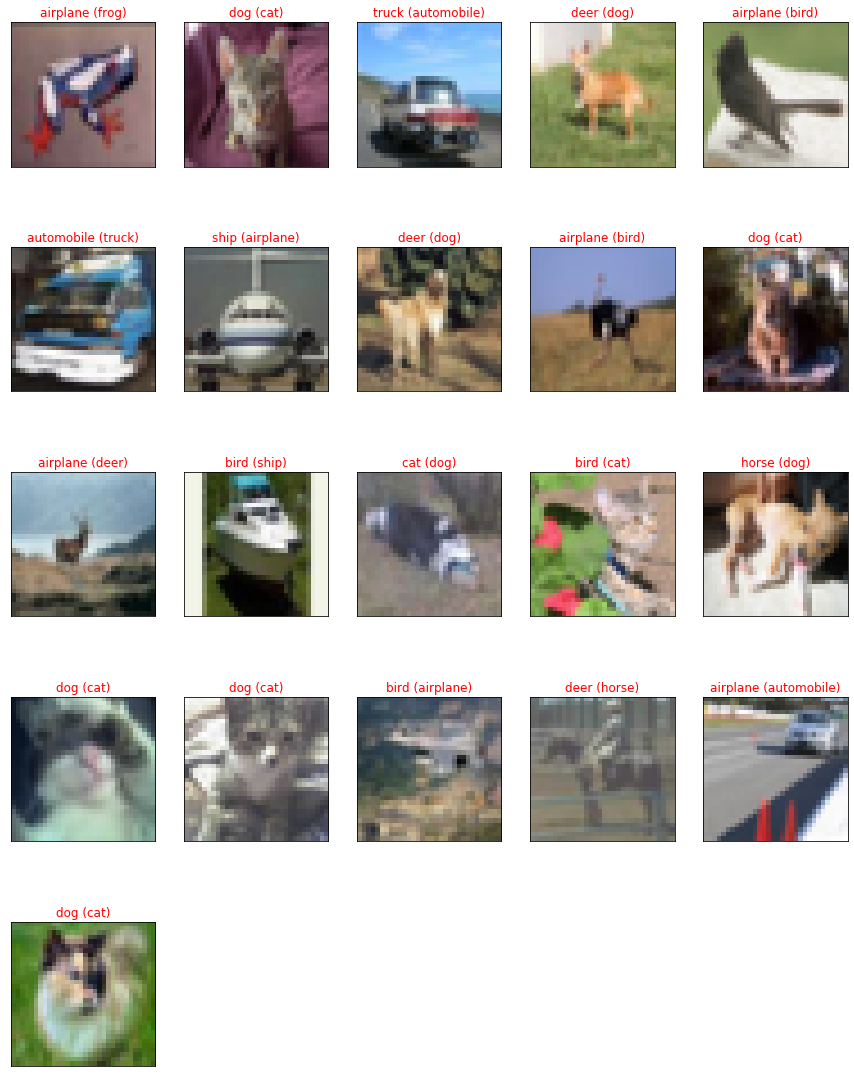

In [17]:
# obtain one batch of test images
dataiterator = iter(test_loader)
plotdata.PlotData.plotmisclassifiedimages(dataiterator=dataiterator,model=cnn_model,classes=classes)

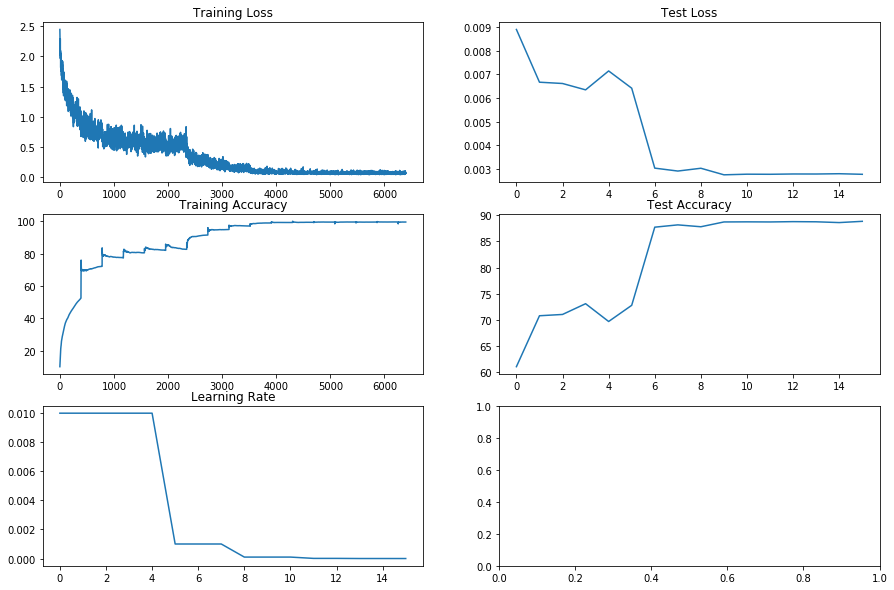

In [18]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
plotdata.PlotData.plottesttraingraph(train_losses=train_losses,train_acc=train_acc,test_losses=test_losses,
                                     test_acc=test_acc,lr_data=lr_data)

In [19]:
utils.Utils.savemodel(model=cnn_model,epoch=epochs,path="savedmodels/finalmodelwithdata.pt",optimizer_state_dict=optimizer.state_dict
                      ,train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses)